In [1]:
import numpy as np
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import DataLoader   #包装可迭代的数据
import torch.utils.data as Data 

from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

In [2]:
label=np.genfromtxt('image_data_label.csv',delimiter=',')
label=label.reshape((9532,1))   #设置格式
print(label.shape)
label=torch.from_numpy(label)   #将numpy转为tensor
label=label.to(torch.float32)

(9532, 1)


In [3]:
label[0].shape

torch.Size([1])

In [4]:
interaction_image=np.genfromtxt('image_data.csv',delimiter=',')
interaction_image=interaction_image.reshape((9532,1,32,32))
print(interaction_image.shape)
interaction_image=torch.from_numpy(interaction_image)
interaction_image=interaction_image.to(torch.float32)
print(type(interaction_image))

(9532, 1, 32, 32)
<class 'torch.Tensor'>


In [5]:
#将图像和标签拼接为一个数据集，以便进行批处理
datasets=Data.TensorDataset(interaction_image,label)

In [6]:
datasets.tensors

(tensor([[[[ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 1.,  0.,  0.,  ...,  1.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           ...,
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]],
 
 
         [[[ 2.,  3.,  4.,  ...,  0.,  0.,  0.],
           [ 2.,  2.,  3.,  ...,  0.,  0.,  0.],
           [ 3.,  5.,  4.,  ...,  0.,  0.,  0.],
           ...,
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  ...,  0.,  0.,  0.]]],
 
 
         [[[ 3.,  2.,  0.,  ...,  0.,  0.,  0.],
           [24., 12.,  6.,  ...,  0.,  0.,  0.],
           [23., 20., 13.,  ...,  0.,  0.,  0.],
           ...,
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  ...,  0.,  0.,  0.]]],
 
 
         ...,
 
 
         [[[36., 11.,  3.,  ...,  

In [7]:
datasets.tensors[0][0].sum()

tensor(1173.)

In [8]:
datasets.tensors[0][23][0]

tensor([[ 3.,  0.,  4.,  ...,  0.,  0.,  0.],
        [13., 14., 12.,  ...,  0.,  0.,  0.],
        [ 9., 13., 11.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]])

In [9]:
#划分训练集测试集   这里暂时使用8:2的划分，后续进行修改
train_size=round(0.8*interaction_image.shape[0])
#test_size=interaction_image.shape[0]-train_size
test_size=round(0.1*interaction_image.shape[0])
valid_size=interaction_image.shape[0]-train_size-test_size
print(train_size,test_size,valid_size)
#print(train_size,test_size)
#train_dataset,test_dataset=Data.random_split(datasets,[train_size,test_size])
train_dataset,test_dataset,valid_dataset=Data.random_split(datasets,[train_size,test_size,valid_size])


7626 953 953


In [10]:
for i in train_dataset:
    print(i)

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 1.],
         ...,
         [1., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 1.,  ..., 0., 0., 0.],
         [1., 2., 0.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 3., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 3., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [1., 0., 2.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [2., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 1., 0.],
         [0., 0., 0.,  ..., 0., 1., 2.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [2., 2., 0.,  ..., 0., 0., 0.],
         [0., 2., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[1., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 3.,  ..., 0., 0., 0.],
         [1., 2., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 2.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 1., 0.,  ..., 0., 0., 0.],
         [2., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [1., 3., 2.,  ..., 0., 0., 0.],
         [1., 1., 5.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[5., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 5.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[3., 0., 0.,  ..., 0., 0., 0.],
         [2., 0., 0.,  ..., 0., 0., 0.],
         [1., 3., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[3., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 3.,  ..., 0., 0., 0.],
         [0., 3., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[3., 0., 2.,  ..., 0., 0., 0.],
         [3., 1., 0.,  ..., 0., 0., 0.],
         [4., 3., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         [3., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 1.,  0.,  0.,  ...,  0.,  0.,  0.],
         [12.,  7.,  1.,  ...,  0.,  0.,  0.],
         [25., 18.,  7.,  ...,  0.,  0.,  0.],
         ...,
         [

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 2.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 1., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 2., 1., 2.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[1., 2., 9.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 1., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 6., 2.,  ..., 0., 0., 0.],
         [2., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [2., 0., 0.,  ..., 0., 0., 0.],
         [6., 3., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[2., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         [2., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 4.,  ..., 0., 0., 0.],
         [1., 0., 2.,  ..., 0., 0., 0.],
         [1., 4., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 

(tensor([[[ 4.,  0.,  1.,  ...,  0.,  0.,  0.],
         [ 8.,  4.,  7.,  ...,  0.,  0.,  0.],
         [ 3.,  9., 10.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 2., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 6., 10.,  5.,  ...,  0.,  0.,  0.],
         [ 5., 18., 14.,  ...,  0.,  0.,  0.],
         [10., 13., 13.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  1.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[ 9., 16.,  8.,  ...,  0.,  0.,  0.],
         [ 4., 13., 20.,  ...,  0.,  0.,  0.],

(tensor([[[6., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 3.,  ..., 0., 0., 0.],
         [0., 1., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 4.,  4.,  3.,  ...,  0.,  0.,  0.],
         [ 3.,  5.,  8.,  ...,  0.,  0.,  0.],
         [ 0.,  4., 11.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 3., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[24., 48., 69.,  ...,  0.,  0.,  1.],
         [ 1.,  4.,  7.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  5.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 1., 1.,  ..., 0., 0., 0.],
         [1., 0., 3.,  ..., 0., 0., 0.],
         [0., 2., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [2., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 6.,  6.,  4.,  ...,  0.,  0.,  0.],
         [ 6.,  3.,  3.,  ...,  0.,  0.,  0.],
         [ 6., 13.,  9.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 8., 12.,  8.,  ...,  0.,  0.,  0.],
         [ 1.,  1.,  3.,  ...,  0.,  0.,  0.],
         [ 1.,  2.,  0.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 2., 1.,  ..., 0., 0., 0.],
         [1., 0., 2.,  ..., 0., 0., 0.],
         [0., 1., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[5., 0., 0.,  ..., 0., 0., 0.],
         [6., 3., 3.,  ..., 0., 0., 0.],
         [1., 8., 2.,  ..., 0., 0., 0.],
      

(tensor([[[ 3.,  0.,  4.,  ...,  0.,  0.,  0.],
         [13., 14., 12.,  ...,  0.,  0.,  0.],
         [ 9., 13., 11.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[29., 16.,  6.,  ...,  0.,  0.,  0.],
         [48., 57., 25.,  ...,  0.,  0.,  0.],
         [38., 51., 33.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[1., 0., 1.,  ..., 0., 0., 0.],
         [1., 2., 3.,  ..., 0., 0., 0.],
         [0., 1., 3.,  ..., 1., 0., 1.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[38.,  5.,  0.,  ...,  0.,  0.,  0.],
         [75., 30.,  6.,  ...,  0.,  0.,  0.],
         [36., 66., 14.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  1.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[2., 0., 1.,  ..., 0., 0., 0.],
         [4., 0., 0.,  ..., 0., 0., 0.],
         [2., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 2., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]]]), tensor([0.]))
(tensor([[[ 6., 20., 31.,  ...,  0.,  0.,  1.],
         [ 4., 20., 44.,  ...,  0.,  0.,  0.],
         [ 3., 11., 15.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[19.,  2.,  5.,  ...,  0.,  0.,  0.],
         [20.,  8.,  9.,  ...,  0.,  0.,  0.],
         [14.,  6.,  9.,  ...,  0.,

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[247.,  43.,  21.,  ...,   0.,   0.,   0.],
         [ 39.,  19.,  16.,  ...,   0.,   0.,   0.],
         [ 20.,   7.,  14.,  ...,   0.,   0.,   0.],
         ...,
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.],
         [  0.,   0.,   0.,  ...,   0.,   0.,   0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 3., 1.,  ..., 0., 0., 0.],
         [0

(tensor([[[1., 0., 1.,  ..., 0., 0., 0.],
         [2., 1., 0.,  ..., 0., 0., 0.],
         [4., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[ 2.,  3., 11.,  ...,  0.,  0.,  1.],
         [ 1.,  0.,  3.,  ...,  0.,  0.,  0.],
         [ 0.,  2.,  6.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  1.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[0., 1., 3.,  ..., 0., 1., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [2., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
      

(tensor([[[0., 1., 1.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 1.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 1., 2.,  ..., 0., 0., 0.],
         [1., 2., 2.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[9., 0., 1.,  ..., 0., 0., 0.],
         [5., 2., 2.,  ..., 1., 0., 0.],
         [6., 6., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 1., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[ 3.,  0.,  0.,  ...,  0.,  0.,  0.],
         [11.,  9.,  1.,  ...,  0.,  0.,  0.],
         [ 6., 13.,  7.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  1.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [3., 1., 0.,  ..., 0., 0., 0.],
         [2., 5., 3.,  ..., 0., 0., 0.],
      

(tensor([[[1., 4., 1.,  ..., 0., 0., 0.],
         [0., 2., 3.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[ 4.,  1.,  0.,  ...,  0.,  0.,  0.],
         [ 6.,  1.,  3.,  ...,  0.,  0.,  1.],
         [20.,  3.,  1.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  1.,  1.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  1.,  ...,  0.,  0.,  0.],
         [ 0.,  1.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[0., 1., 4.,  ..., 0., 0., 0.],
         [1., 2., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 1., 1.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 2., 1.,  ..., 0., 0., 0.],
         [1., 1., 4.,  ..., 0., 0., 0.],
         [0., 3., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 1.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[0., 2., 0.,  ..., 0., 0., 0.],
         [2., 0., 1.,  ..., 0., 0., 0.],
         [1., 3., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 2., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 3.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[34.,  5.,  4.,  ...,  0.,  0.,  0.],
         [58., 12.,  7.,  ...,  0.,  0.,  0.],
         [54., 11., 10.,  ...,  0.,  0.,  0.],
         ...,
         [ 1.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 2.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[5., 2., 2.,  ..., 0., 0., 0.],
         [0., 2., 4.,  ..., 0., 0., 0.],
         [3., 9., 4.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 1.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
      

(tensor([[[16.,  8.,  5.,  ...,  0.,  0.,  0.],
         [15., 20., 12.,  ...,  1.,  0.,  0.],
         [13., 25., 22.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  1.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[0., 3., 4.,  ..., 0., 0., 0.],
         [1., 1., 4.,  ..., 0., 0., 1.],
         [1., 3., 5.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[20., 11.,  5.,  ...,  0.,  0.,  0.],
         [11., 16.,  6.,  ...,  0.,  0.,  1.],
         [18., 12., 16.,  ...,  0.,

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [2., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         [1., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [1., 2., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[19., 19., 22.,  ...,  0.,  0.,  0.],
         [10., 28., 33.,  ...,  0.,  1.,  0.],
         [ 2., 12., 14.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[1., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 6.,  2.,  2.,  ...,  0.,  0.,  0.],
         [ 7., 12., 10.,  ...,  1.,  0.,  0.],
         [ 2.,  8.,  7.,  ...,  2.,  0.,  2.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[2., 4., 6.,  ..., 0., 1., 0.],
         [1., 2., 3.,  ..., 0., 0., 1.],
         [0

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[82., 31.,  8.,  ...,  0.,  0.,  0.],
         [40., 43., 15.,  ...,  0.,  0.,  0.],
         [18., 26., 29.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  2.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  2.,  1.],
         [ 0.,  0.,  0.,  ...,  2.,  0.,  4.]]]), tensor([1.]))
(tensor([[[1., 1., 1.,  ..., 0., 0., 0.],
         [1., 2., 2.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 4.,  8., 15.,  ...,  0.,  0.,  1.],
         [ 0.,  3.,  6.,  ...,  0.,  0.,  0.],
         [ 0.,  1.,  3.,  ...,  2.,

(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [1., 0., 1.,  ..., 0., 0., 0.],
         [1., 1., 2.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 1.,  ..., 3., 1., 2.],
         [0., 0., 0.,  ..., 1., 2., 0.],
         [0., 1., 0.,  ..., 0., 0., 1.]]]), tensor([1.]))
(tensor([[[0., 1., 2.,  ..., 0., 0., 0.],
         [1., 1., 3.,  ..., 0., 0., 0.],
         [2., 3., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[74., 77., 51.,  ...,  0.,  0.,  1.],
         [16., 27., 12.,  ...,  0.,  0.,  0.],
         [ 5.,  6.,  9.,  ...,  0.,  0.,  0.],
         ...,
         [

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[2., 2., 0.,  ..., 0., 0., 0.],
         [2., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 

(tensor([[[ 3.,  4.,  3.,  ...,  0.,  0.,  0.],
         [ 0.,  6.,  5.,  ...,  0.,  0.,  0.],
         [ 6.,  7., 10.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([1.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 2.,  ..., 0., 0., 0.],
         [1., 2., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[ 1.,  3.,  2.,  ...,  0.,  0.,  0.],
         [ 3.,  6., 10.,  ...,  0.,  0.,  0.],
         [ 3.,  8., 10.,  ...,  0.,

(tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 1., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[5., 8., 9.,  ..., 0., 0., 0.],
         [0., 5., 7.,  ..., 0., 0., 0.],
         [1., 5., 3.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[88., 51., 31.,  ...,  0.,  0.,  0.],
         [46., 43., 42.,  ...,  0.,  0.,  0.],
         [30., 21., 27.,  ...,  0.,  0.,  0.],
         ...,
         [

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[1., 0., 1.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), tensor([0.]))
(tensor([[[15.,  5.,  7.,  ...,  0.,  0.,  0.],
         [16., 14.,  9.,  ...,  0.,  0.,  0.],
         [26., 24., 16.,  ...,  0.,  0.,  0.],
         ...,
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
         [ 0.,  0.,  0.,  ...,  0.,  0.,  0.]]]), tensor([1.]))
(tensor([[[0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 1.,  ..., 0., 0., 0.],
      

In [11]:
#将数据集作为参数传递给DataLoader。这在我们的数据集上包裹了一个可迭代的数据集，并支持自
#动批处理、采样、洗牌和多进程数据加载。在这里，我们定义了一个64的批处理大小，即dataloader可
#迭代的每个元素将返回一个批次，包括64个元素的特征和标签。
batch_size=32
#创建数据加载器，也就是迭代器，分批次
train_dataloader=DataLoader(train_dataset,batch_size=batch_size)
test_dataloader=DataLoader(test_dataset,batch_size=batch_size)
valid_dataloader=DataLoader(valid_dataset,batch_size=batch_size)


#用所有的数据进行训练试一下
#train_dataloader2=DataLoader(datasets,batch_size=batch_size)

In [12]:
for X,y in test_dataloader:
    print(X)
    print("X[N,C,H,W]的形状：",X.shape)
    print("y的形状:", y.shape,y.dtype)
    break;    #查看一个批次


tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [1., 1., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [1., 0., 0.,  ..., 0., 0., 0.]]],


        [[[5., 0., 1.,  ..., 0., 0., 0.],
          [6., 0., 1.,  ..., 0., 0., 0.],
          [8., 5., 3.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [1., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 1.,  ..., 0., 0., 0.],
          [0., 1., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0.

In [47]:
#用pytorch构建神经网络
#为了在PyTorch中定义一个神经网络，我们创建一个继承自nn.Module的类。我们在init函数中定义网络
#的层，并在forward函数中指定数据将如何通过网络。为了加速神经网络的操作，如果有GPU的话，我
#们把它移到GPU上

device="cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class CnncNet(nn.Module):
    def __init__(self):
        super(CnncNet,self).__init__()
        #self.flatten=nn.Flatten()
        self.conv=nn.Sequential(
            nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,padding=1),    # 输入(1,1,32,32)     输出 (1,32,32,32)  第一个1代表批量大小
            nn.ReLU(),   
            nn.Conv2d(in_channels=32,out_channels=32,kernel_size=(3,3)),     #输入(1,32,32,32)  输出(1,32,30,30)
            nn.ReLU(),
            nn.MaxPool2d(2,2),         #输出 (1,32,15,15)
            nn.Dropout2d(0.25),        ## 表示每个神经元有0.25的可能性不被激活  Dropout只能用在训练部分而不能用在测试部分
    
            nn.Conv2d(in_channels=32,out_channels=64,kernel_size=(3,3),padding=(1,1)),     #输入(1,32,15,15)  #输出(1,64,15,15)
            nn.ReLU(),
            nn.Conv2d(in_channels=64,out_channels=64,kernel_size=(3,3)),      #输入(1,64,15,15)   输出(1,64,13,13)
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Dropout2d(0.25),
    
            nn.Conv2d(in_channels=64,out_channels=128,kernel_size=(3,3),padding=(1,1)),
            nn.ReLU(),
            nn.Conv2d(in_channels=128,out_channels=128,kernel_size=(3,3)),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Dropout2d(0.25),
            nn.Flatten(),      #结果为 (1,512)
            #后续添加的层
            nn.Linear(in_features=512,out_features=512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(in_features=512,out_features=1),    #out_feaures=1是将二分类输出为一个神经元，若是必须得2个，后续在修改，标签也要修改
            nn.Sigmoid()   
            
        )
        #self.FC1=nn.Linear(512,512)
        #self.FC2=nn.Linear(512,1)
        #self.Sg=nn.Sigmoid()
        #self.Rl=nn.ReLU()
        #self.dr=nn.Dropout(0.5)
    def forward(self,x):
        logits=self.conv(x)
        #x=logits.reshape(logits.shape[0],-1)
        #x=self.FC1(x)
        #x=self.Rl(x)
        #x=self.dr(x)
        #x=self.FC2(x)
        #logits=self.Sg(x)
        
        return logits

Using cuda device


In [48]:
#创建模型
model=CnncNet().to(device)
print(model)

CnncNet(
  (conv): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Dropout2d(p=0.25, inplace=False)
    (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (9): ReLU()
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Dropout2d(p=0.25, inplace=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (15): ReLU()
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Dropout2d(p=0.25, inplace=False)
    (18): Flatten(start_dim=1, end_dim=-1)
    (19): Linear(in_features=512, out_fe

In [49]:
def show_ROC(label,pred):
    fpr,tpr,threshold = roc_curve(label, pred) ###计算真正率和假正率
    roc_auc=auc(fpr,tpr)###计算auc的值
    
    plt.figure()
    lw = 2
    plt.figure(figsize=(6,6))
    plt.plot(fpr, tpr, color='darkorange',lw=lw, label='ROC curve (area = %0.3f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()     

In [50]:
def ROC_test(ROC_data,model):
    score_list=np.array([])
    label_list=np.array([])
    model.eval()
    with torch.no_grad():
        for X,y in ROC_data:
            X,y=X.to(device),y.to(device)
            #X=torch.nn.functional.normalize(X)
            pred=model(X)
            #pred=torch.round(model(X))
            label=y.cpu().numpy()
            score=pred.cpu().numpy()
            #if score>0.5 and 1-score<0.3:
            #    score=score
            #elif score>0.5 and 1-score>=0.3:
            #    score=score-0.2
            #if score<0.5 and score-0<0.3:
            #    score=score
            #else:
            #    score=score+0.2
            label_list=np.append(label_list,values=label)
            score_list=np.append(score_list,values=score)
    print(label_list)
    print(score_list)
    show_ROC(label_list,score_list)

In [51]:
#这里是为了做训练，得到当前模型的输出神经元的个数，以便确定后续的全连接的神经元的个数

x=datasets.tensors[0][0][0].reshape((1,1,32,32))
x= x.to(torch.float32)
print(x.shape)
x=x.to(device)
y=model(x)
y.shape

torch.Size([1, 1, 32, 32])


torch.Size([1, 1])

In [52]:
len(train_dataloader.dataset)

7626

In [53]:
len(train_dataloader),len(test_dataloader)#

(239, 30)

In [54]:
#模型构建后，要优化模型参数

#定义一个损失函数和优化器
#loss_fn=nn.CrossEntropyLoss()     #交叉熵损失函数
loss_fn=nn.BCELoss()   
#optimizer=torch.optim.SGD(model.parameters(),lr=0.0001,weight_decay=1e-6,momentum=0.9,nesterov=True)   #优化模型参数，学习率是0.001
#optimizer=torch.optim.SGD(model.parameters(),lr=1e-3)   #优化模型参数，学习率是0.001
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)    #更换这个优化器，模型提高精度显著

In [55]:
#在一个单一的训练循环中，模型对训练数据集（分批送入）进行预测，并通过反向传播预测误差来调整模型的参数

def train(dataloader,model,loss_fn,optimizer):
    size=len(dataloader.dataset)     #数据集中的数据总数，例如训练集中size是4782
    model.train()
    for batch,(X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)    #X就是image_data的批次，y就是对应批次的标签
        
        #计算预测误差
        pred=model(X)
        loss=loss_fn(pred,y)
        #反向传播
        optimizer.zero_grad()  #清空过往梯度
        loss.backward()  #反向传播，计算当前梯度
        optimizer.step() #根据梯度更新网络参数
        
        if batch %50==0: #到50的整数倍，就输出当前的损失
            loss,current=loss.item(),batch*len(X)
            print(f"loss:{loss:>7f}  [{current:>5d}/{size:>5d}]")

In [56]:
#还根据测试数据集检查模型的性能，以确保它在学习
def test(dataloader,model,loss_fn):
    size=len(dataloader.dataset)   #数据集中的行数
    num_batches=len(dataloader)    #一共有的批次数,训练集中是150，测试集是38，每一个批次有32个数据及其标签
    model.eval()
    test_loss,correct=0,0
    with torch.no_grad():  #代表张量中的元素不会自动求导，也就不会保存梯度，节省时间和空间
        for X,y in dataloader:
            X,y=X.to(device),y.to(device)
            pred=model(X)
            #print(pred)
            test_loss+=loss_fn(pred,y).item()
            correct+=(torch.abs(pred-y)<0.3).sum().item()
        test_loss/=num_batches
        correct/=size
        print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss:{test_loss:>8f} \n")

In [57]:
###############################交叉验证版本：将训练集分为K-1个训练集，1个验证集，结束后，用测试集画roc##############################3
kf = KFold(n_splits=9, shuffle=True, random_state=0)
epchs=5
i=0
for t in range(epchs):
    print(f"Epoch {t+1}\n-------------------")
    for train_index, val_index in kf.split(train_dataset):   #这里是5次循环
        i=i+1
        train_fold = torch.utils.data.dataset.Subset(train_dataset, train_index)   #训练集
        #print(train_fold)
        val_fold = torch.utils.data.dataset.Subset(train_dataset, val_index)      #验证集
        #打包成DataLoader类型 用于 训练
        train_loader = DataLoader(dataset=train_fold, batch_size=32, shuffle=True)
        val_loader = DataLoader(dataset=val_fold, batch_size=32, shuffle=True)
        
        #ROC_loader=DataLoader(dataset=val_fold, batch_size=1)  #对每个测试集整体画ROC曲线
        
        train(train_loader,model,loss_fn,optimizer)
        test(val_loader,model,loss_fn)   #这里仅仅是为了看正确率，判断是否在训练
        
    #ROC_test(ROC_loader,model)
print(i)#记录训练了多少次      
print("done!")

Epoch 1
-------------------
loss:0.689121  [    0/ 6778]
loss:0.606692  [ 1600/ 6778]
loss:0.729265  [ 3200/ 6778]
loss:0.634116  [ 4800/ 6778]
loss:0.594076  [ 6400/ 6778]
Test Error: 
 Accuracy: 0.0%, Avg loss:0.640845 

loss:0.682291  [    0/ 6778]
loss:0.715186  [ 1600/ 6778]
loss:0.449558  [ 3200/ 6778]
loss:0.613410  [ 4800/ 6778]
loss:0.652285  [ 6400/ 6778]
Test Error: 
 Accuracy: 40.7%, Avg loss:0.635979 

loss:0.505525  [    0/ 6778]
loss:0.619441  [ 1600/ 6778]
loss:0.668346  [ 3200/ 6778]
loss:0.645463  [ 4800/ 6778]
loss:0.652722  [ 6400/ 6778]
Test Error: 
 Accuracy: 39.5%, Avg loss:0.597333 

loss:0.595931  [    0/ 6779]
loss:0.644498  [ 1600/ 6779]
loss:0.615609  [ 3200/ 6779]
loss:0.581646  [ 4800/ 6779]
loss:0.743873  [ 6400/ 6779]
Test Error: 
 Accuracy: 26.0%, Avg loss:0.633137 

loss:0.597664  [    0/ 6779]
loss:0.794652  [ 1600/ 6779]
loss:0.628147  [ 3200/ 6779]
loss:0.587639  [ 4800/ 6779]
loss:0.703808  [ 6400/ 6779]
Test Error: 
 Accuracy: 20.8%, Avg loss:0.60

loss:0.243604  [ 1600/ 6779]
loss:0.282926  [ 3200/ 6779]
loss:0.329588  [ 4800/ 6779]
loss:0.333584  [ 6400/ 6779]
Test Error: 
 Accuracy: 81.6%, Avg loss:0.314874 

loss:0.425931  [    0/ 6779]
loss:0.211904  [ 1600/ 6779]
loss:0.301985  [ 3200/ 6779]
loss:0.376300  [ 4800/ 6779]
loss:0.438676  [ 6400/ 6779]
Test Error: 
 Accuracy: 80.9%, Avg loss:0.205866 

loss:0.332647  [    0/ 6779]
loss:0.353371  [ 1600/ 6779]
loss:0.373752  [ 3200/ 6779]
loss:0.411788  [ 4800/ 6779]
loss:0.502978  [ 6400/ 6779]
Test Error: 
 Accuracy: 83.6%, Avg loss:0.173683 

loss:0.275810  [    0/ 6779]
loss:0.347795  [ 1600/ 6779]
loss:0.403375  [ 3200/ 6779]
loss:0.304006  [ 4800/ 6779]
loss:0.391585  [ 6400/ 6779]
Test Error: 
 Accuracy: 86.4%, Avg loss:0.151381 

45
done!


Test Error: 
 Accuracy: 52.4%, Avg loss:1.091580 

[1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.


<Figure size 640x480 with 0 Axes>

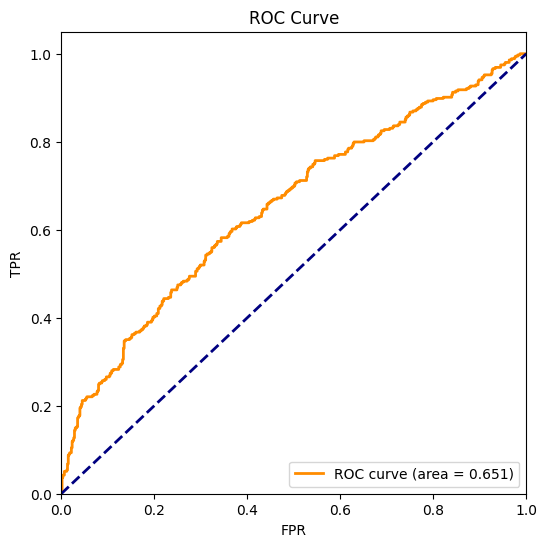

[0. 1. 1. ... 1. 0. 1.]
[0.01954289 0.9929046  0.9549166  ... 0.95231384 0.0222392  0.96821153]


<Figure size 640x480 with 0 Axes>

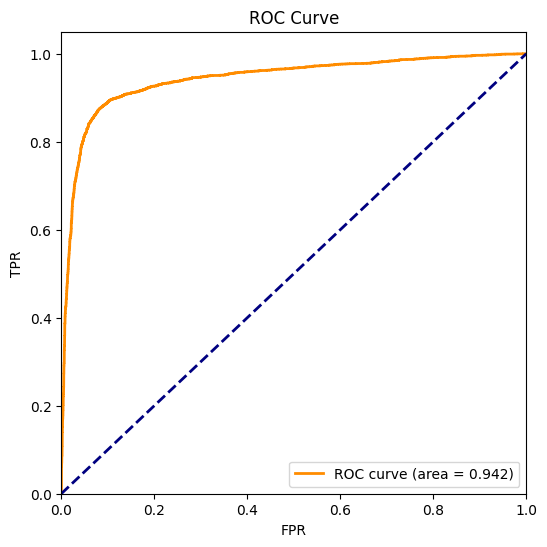

In [60]:
#测试集的精度
test_loader=DataLoader(dataset=test_dataset, batch_size=32)  #对每个测试集整体画ROC曲线
test(test_loader,model,loss_fn) 
#在测试集上画roc
ROC_loader=DataLoader(dataset=test_dataset, batch_size=1)  #对每个测试集整体画ROC曲线
ROC_test(ROC_loader,model)
#在整个数据集画roc曲线
ROC_total_loader=DataLoader(dataset=datasets, batch_size=1)  #对每个测试集整体画ROC曲线
ROC_test(ROC_total_loader,model)

In [61]:
#保存模型
torch.save(model.state_dict(),"WGCNA_CNN_2023.9.24_accuracy_86.4_roc_0.9.pth")
print("保存模型状态到WGCNA_CNN_2023.9.24_accuracy_86.4_roc_0.9.pth")

保存模型状态到WGCNA_CNN_2023.9.24_accuracy_86.4_roc_0.9.pth


In [45]:

#################################无交叉验证版本############################################
#训练过程是通过几个迭代（epochs）进行的。在每个epoch中，模型学习参数以做出更好的预测。我们
#在每个epoch中打印模型的准确度和损失；我们希望看到准确度在每个epoch中增加，损失在每个epoch
#中减少。
epchs=100
for t in range(epchs):
    print(f"Epoch {t+1}\n-------------------")
    train(train_dataloader,model,loss_fn,optimizer)  #每一次迭代，都会训练模型
    #train(train_dataloader2,model,loss_fn,optimizer)  #用全部数据做训练，看看效果
    test(valid_dataloader,model,loss_fn)  #每一次训练模型，都会使用验证集进行测试，评估当前模型的性能
print("done!")


Epoch 1
-------------------
loss:0.454969  [    0/ 7626]
loss:0.059935  [ 1600/ 7626]
loss:0.183157  [ 3200/ 7626]
loss:0.257301  [ 4800/ 7626]
loss:0.068144  [ 6400/ 7626]
Test Error: 
 Accuracy: 56.9%, Avg loss:1.526309 

Epoch 2
-------------------
loss:0.094172  [    0/ 7626]
loss:0.062097  [ 1600/ 7626]
loss:0.087779  [ 3200/ 7626]
loss:0.037194  [ 4800/ 7626]
loss:0.047814  [ 6400/ 7626]
Test Error: 
 Accuracy: 56.7%, Avg loss:1.575290 

Epoch 3
-------------------
loss:0.334638  [    0/ 7626]
loss:0.123795  [ 1600/ 7626]
loss:0.108221  [ 3200/ 7626]
loss:0.188707  [ 4800/ 7626]
loss:0.059434  [ 6400/ 7626]
Test Error: 
 Accuracy: 57.0%, Avg loss:1.607817 

Epoch 4
-------------------
loss:0.106418  [    0/ 7626]
loss:0.065579  [ 1600/ 7626]
loss:0.098040  [ 3200/ 7626]
loss:0.069286  [ 4800/ 7626]
loss:0.047046  [ 6400/ 7626]
Test Error: 
 Accuracy: 57.8%, Avg loss:1.567349 

Epoch 5
-------------------
loss:0.061383  [    0/ 7626]
loss:0.201685  [ 1600/ 7626]
loss:0.064577  [ 3

loss:0.094097  [ 4800/ 7626]
loss:0.159351  [ 6400/ 7626]
Test Error: 
 Accuracy: 59.0%, Avg loss:2.003031 

Epoch 38
-------------------
loss:0.008940  [    0/ 7626]
loss:0.059243  [ 1600/ 7626]
loss:0.017030  [ 3200/ 7626]
loss:0.032769  [ 4800/ 7626]
loss:0.024992  [ 6400/ 7626]
Test Error: 
 Accuracy: 59.1%, Avg loss:1.966615 

Epoch 39
-------------------
loss:0.029086  [    0/ 7626]
loss:0.104121  [ 1600/ 7626]
loss:0.026627  [ 3200/ 7626]
loss:0.041180  [ 4800/ 7626]
loss:0.210454  [ 6400/ 7626]
Test Error: 
 Accuracy: 58.8%, Avg loss:1.965890 

Epoch 40
-------------------
loss:0.043870  [    0/ 7626]
loss:0.022473  [ 1600/ 7626]
loss:0.037573  [ 3200/ 7626]
loss:0.031472  [ 4800/ 7626]
loss:0.081890  [ 6400/ 7626]
Test Error: 
 Accuracy: 60.0%, Avg loss:2.084916 

Epoch 41
-------------------
loss:0.151152  [    0/ 7626]
loss:0.097440  [ 1600/ 7626]
loss:0.093733  [ 3200/ 7626]
loss:0.054934  [ 4800/ 7626]
loss:0.240563  [ 6400/ 7626]
Test Error: 
 Accuracy: 58.9%, Avg loss:1.

loss:0.017678  [ 1600/ 7626]
loss:0.030477  [ 3200/ 7626]
loss:0.003043  [ 4800/ 7626]
loss:0.042826  [ 6400/ 7626]
Test Error: 
 Accuracy: 58.6%, Avg loss:2.030603 

Epoch 75
-------------------
loss:0.001839  [    0/ 7626]
loss:0.049408  [ 1600/ 7626]
loss:0.013630  [ 3200/ 7626]
loss:0.132399  [ 4800/ 7626]
loss:0.009641  [ 6400/ 7626]
Test Error: 
 Accuracy: 59.1%, Avg loss:2.067379 

Epoch 76
-------------------
loss:0.118705  [    0/ 7626]
loss:0.159963  [ 1600/ 7626]
loss:0.081750  [ 3200/ 7626]
loss:0.029724  [ 4800/ 7626]
loss:0.022313  [ 6400/ 7626]
Test Error: 
 Accuracy: 58.3%, Avg loss:2.038492 

Epoch 77
-------------------
loss:0.008945  [    0/ 7626]
loss:0.073786  [ 1600/ 7626]
loss:0.166572  [ 3200/ 7626]
loss:0.052696  [ 4800/ 7626]
loss:0.104583  [ 6400/ 7626]
Test Error: 
 Accuracy: 58.7%, Avg loss:2.024062 

Epoch 78
-------------------
loss:0.097281  [    0/ 7626]
loss:0.044755  [ 1600/ 7626]
loss:0.032139  [ 3200/ 7626]
loss:0.048257  [ 4800/ 7626]
loss:0.009662

Test Error: 
 Accuracy: 52.4%, Avg loss:1.091580 

[1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1.


<Figure size 640x480 with 0 Axes>

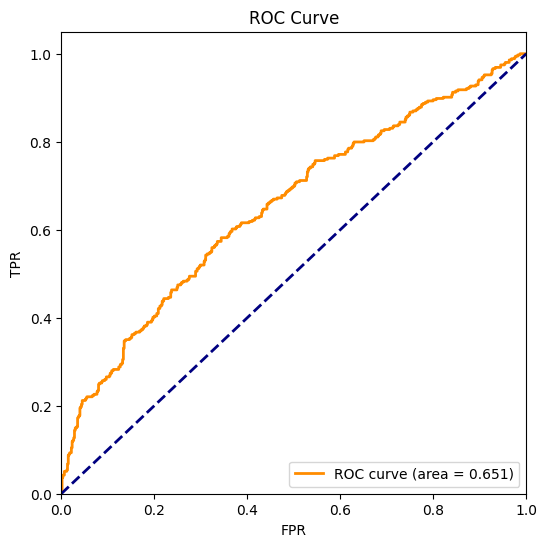

[0. 1. 1. ... 1. 0. 1.]
[0.01954289 0.9929046  0.9549166  ... 0.95231384 0.0222392  0.96821153]


<Figure size 640x480 with 0 Axes>

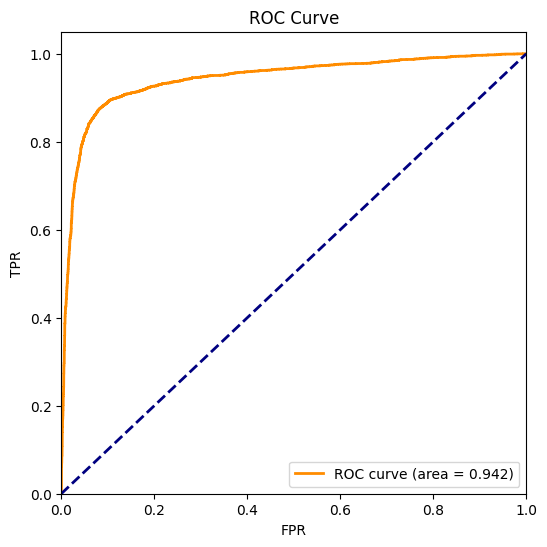

In [59]:
#测试集的精度
test_loader=DataLoader(dataset=test_dataset, batch_size=32)  #对每个测试集整体画ROC曲线
test(test_loader,model,loss_fn) 
#在测试集上画roc
ROC_loader=DataLoader(dataset=test_dataset, batch_size=1)  #对每个测试集整体画ROC曲线
ROC_test(ROC_loader,model)
#在整个数据集画roc曲线
ROC_total_loader=DataLoader(dataset=datasets, batch_size=1)  #对每个测试集整体画ROC曲线
ROC_test(ROC_total_loader,model)

In [63]:
#保存模型
torch.save(model.state_dict(),"WGCNA_CNN_model_2023.9.23_62_no_crosss_valid_0.731.pth")
print("保存模型状态到WGCNA_CNN_model_2023.9.23_62_no_crosss_valid_0.731.pth")

保存模型状态到WGCNA_CNN_model_2023.9.23_62_no_crosss_valid_0.731.pth


In [66]:
#保存模型
torch.save(model.state_dict(),"WGCNA_CNN_model.pth")
print("保存模型状态到model.pth")

保存模型状态到model.pth
